# Split–apply–combine

One of the most important workflows in data analysis is called **split–apply–combine**:

1. Split the data into groups based on a criterion (e.g., species, marital status).
2. Apply operations to the data within each group.
3. Combine the results from the groups.

Of these, the *apply* step is usually the most complex.

## Split

The `groupby` method for a data frame splits the frame into groups based on categorical values in a designated column. For illustrations, we will load a dataset supplied with seaborn. 

In [2]:
import pandas as pd
import seaborn as sns

penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [3]:
by_species = penguins.groupby("species")

Nothing is actually done yet to the data frame. It's just set up for applying operations to each group.

In [8]:
for name,group in by_species:
    print(name)
    print(group.iloc[:3,:4])
    print()

Adelie
  species     island  bill_length_mm  bill_depth_mm
0  Adelie  Torgersen            39.1           18.7
1  Adelie  Torgersen            39.5           17.4
2  Adelie  Torgersen            40.3           18.0

Chinstrap
       species island  bill_length_mm  bill_depth_mm
152  Chinstrap  Dream            46.5           17.9
153  Chinstrap  Dream            50.0           19.5
154  Chinstrap  Dream            51.3           19.2

Gentoo
    species  island  bill_length_mm  bill_depth_mm
220  Gentoo  Biscoe            46.1           13.2
221  Gentoo  Biscoe            50.0           16.3
222  Gentoo  Biscoe            48.7           14.1



A common operation is to "bin" the values of a continuous variable into intervals. You can group by bins using `cut`.

In [16]:
cuts = pd.cut(penguins["bill_length_mm"],[0,30,40,50,100])
by_length = penguins.groupby(cuts)
for name,group in by_length:
    print(name)
    print(group.iloc[:3,:4])
    print()

(0, 30]
Empty DataFrame
Columns: [species, island, bill_length_mm, bill_depth_mm]
Index: []

(30, 40]
  species     island  bill_length_mm  bill_depth_mm
0  Adelie  Torgersen            39.1           18.7
1  Adelie  Torgersen            39.5           17.4
4  Adelie  Torgersen            36.7           19.3

(40, 50]
   species     island  bill_length_mm  bill_depth_mm
2   Adelie  Torgersen            40.3           18.0
9   Adelie  Torgersen            42.0           20.2
12  Adelie  Torgersen            41.1           17.6

(50, 100]
       species island  bill_length_mm  bill_depth_mm
154  Chinstrap  Dream            51.3           19.2
156  Chinstrap  Dream            52.7           19.8
159  Chinstrap  Dream            51.3           18.2



## Apply

The most complex step is applying operations to each group of data. There are three types of operations:

* **Aggregation** refers to summarizing data by a single value, such as a sum or mean, or by a few values, such as value counts or quintiles.
* **Transformation** refers to application of a mathematical operation to every data value, resulting in data indexed the same way as the original. For example, quantitative data might be transformed to lie in the interval $[0,1]$.
* **Filtration** refers to inclusion/removal of a group based on a criterion, such as rejection of a group with too few members.

### Aggregation

Many common operations are defined for aggregation.

In [17]:
by_length.sum()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,,,,
"(0, 30]",0.0,0.0,0.0,0.0
"(30, 40]",3729.4,1811.3,18828.0,355800.0
"(40, 50]",8593.8,3129.3,38979.0,843100.0
"(50, 100]",2698.1,925.1,10906.0,238100.0


In [18]:
by_length.count()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
bill_length_mm,,,,,,,
"(0, 30]",0,0,0,0,0,0,0
"(30, 40]",100,100,100,100,100,100,96
"(40, 50]",190,190,190,190,190,190,185
"(50, 100]",52,52,52,52,52,52,52


Note that after grouping has been done, you can refer to subsets of values within the group in the usual way.

In [21]:
by_species["island"].value_counts()

species    island   
Adelie     Dream         56
           Torgersen     52
           Biscoe        44
Chinstrap  Dream         68
Gentoo     Biscoe       124
Name: island, dtype: int64

Statistical summaries can also be computed by group.

In [22]:
by_species.mean()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.791391,18.346358,189.953642,3700.662252
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Gentoo,47.504878,14.982114,217.186992,5076.016260


In [24]:
by_species["body_mass_g"].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Adelie,151.0,3700.662252,458.566126,2850.0,3350.0,3700.0,4000.0,4775.0
Chinstrap,68.0,3733.088235,384.335081,2700.0,3487.5,3700.0,3950.0,4800.0
Gentoo,123.0,5076.016260,504.116237,3950.0,4700.0,5000.0,5500.0,6300.0


A list of the most common predefined aggregation functions is given in {numref}`table-aggregators`. These functions ignore `NaN` (missing) values. 

```{list-table} Aggregation functions
:name: table-aggregators
* - `mean`
  - Mean of group values
* - `sum`
  - Sum of group values
* - `count`
  - Count of group values
* - `std`, `var`
  - Standard deviation or variance within groups
* - `describe`
  - Descriptive statistics
* - `first`, `last`
  - First or last of group values
* - `min`, `max`
  - Min or max within groups
```


If you want a more exotic operation, you can call `agg` with your own function.

In [29]:
def iqr(x):
    q1,q3 = x.quantile([.25,.75])
    return q3-q1

by_length["bill_length_mm"].agg(iqr)


bill_length_mm
(0, 30]        NaN
(30, 40]     2.800
(40, 50]     4.875
(50, 100]    1.625
Name: bill_length_mm, dtype: float64

### Transformation

In the simplest case, a transformation applies a function to each element of a column, producing a result of the same length that can be indexed the same way. For example, we can standardize to z-scores within each group separately, rather than based on the global mean and std. 

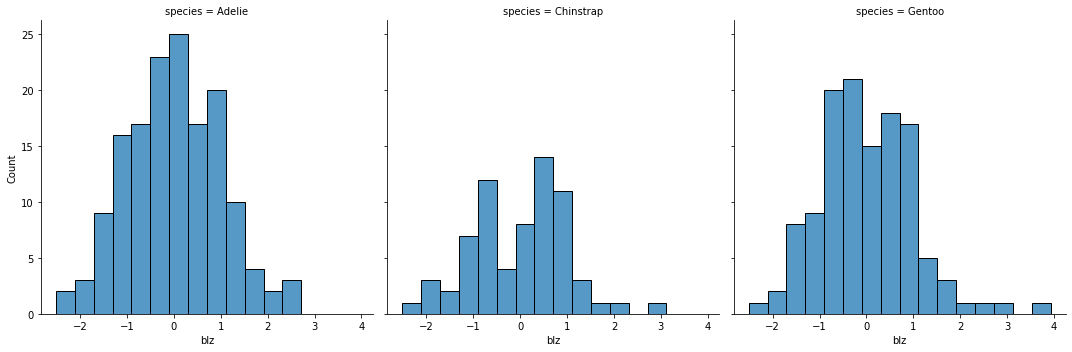

In [34]:
def standardize(x):
    return (x-x.mean())/x.std()

penguins["group_z"] = by_species["bill_length_mm"].transform(standardize)
sns.displot(data=penguins,x="group_z",col="species");

If we standardize instead by the global statistics, then the group distributions won't be standardized.

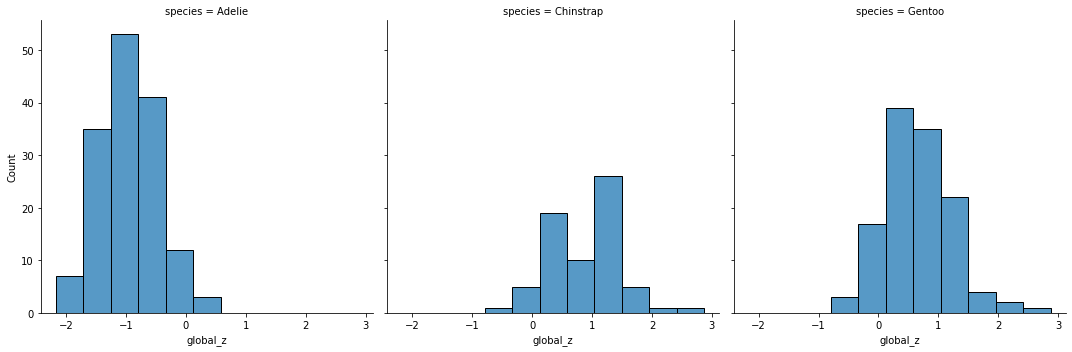

In [ ]:
penguins["global_z"] = standardize(penguins["bill_length_mm"])
sns.displot(data=penguins,x="global_z",col="species");

### Filtering

To apply a filter, provide a function that operates on a column and returns either `True`, meaning to keep the column, or `False`, meaning to reject it. For example, suppose we want to group penguins by body mass. 

In [99]:
cuts = pd.cut(penguins["body_mass_g"],range(2000,7000,500))
by_mass = penguins.groupby(cuts)
by_mass["species"].count()

body_mass_g
(2000, 2500]     0
(2500, 3000]    11
(3000, 3500]    67
(3500, 4000]    92
(4000, 4500]    57
(4500, 5000]    54
(5000, 5500]    33
(5500, 6000]    26
(6000, 6500]     2
Name: species, dtype: int64

If we want to drop the penguins that fall into groups having fewer than 30 penguins, we use `filter`.

In [100]:
mass_30 = by_mass.filter(lambda x: len(x) > 29)
mass_30

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,blz,global_z
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0.115870,-0.883205
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0.266054,-0.809939
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0.566421,-0.663408
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,-0.785232,-1.322799
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,0.190962,-0.846572
...,...,...,...,...,...,...,...,...,...
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN,-0.975022,0.105882
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female,-0.098927,0.600425
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,-0.228719,0.527159
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,-0.747886,0.234097


Notice that the result has been merged (ungrouped) back into a single frame. We can regroup the result, however.

In [101]:
cuts = pd.cut(mass_30["body_mass_g"],range(2000,7000,500))
mass_30.groupby(cuts)["species"].count()

body_mass_g
(2000, 2500]     0
(2500, 3000]     0
(3000, 3500]    67
(3500, 4000]    92
(4000, 4500]    57
(4500, 5000]    54
(5000, 5500]    33
(5500, 6000]     0
(6000, 6500]     0
Name: species, dtype: int64

## Combine

Pandas assembles the results of an application into a series or data frame, depending on the context. Sometimes, you might want to store those values in the original data frame, as shown above with group standardization.

It's common to form chains of operations that can be written separately or in one line. For example, consider the task of **imputation**, which is the replacement of missing values by a standard value such as the mean or median. In the penguin dataset, there are two rows with missing numerical values:

In [ ]:
bills = ["bill_length_mm","bill_depth_mm"]
penguins[bills].isna().sum()

bill_length_mm    2
bill_depth_mm     2
dtype: int64

Given variations between species, we probably want to compute values aggregated by species. 

In [ ]:
by_species = penguins.groupby("species")
by_species[bills].median()

,bill_length_mm,bill_depth_mm
species,,
Adelie,38.80,18.40
Chinstrap,49.55,18.45
Gentoo,47.30,15.00


In order to operate columnwise, we apply a custom transformation function using the `fillna` method to replace missing values. 

In [ ]:
def impute(col):
    return col.fillna(col.median())

replaced = by_species[bills].transform(impute)
replaced

,bill_length_mm,bill_depth_mm
0,39.1,18.7
1,39.5,17.4
2,40.3,18.0
3,38.8,18.4
4,36.7,19.3
...,...,...
339,47.3,15.0
340,46.8,14.3
341,50.4,15.7
342,45.2,14.8


Replacement has happened in the row with index 3, for example. Finally, we can overwrite the columns of the original data frame, if we don't care to know in the future which values were imputed. All of the necessary steps can be compressed into one chain:

In [ ]:
penguins[bills] = penguins.groupby("species")[bills].transform(lambda x: x.fillna(x.median()))
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,blz,global_z
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0.115870,-0.883205
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0.266054,-0.809939
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0.566421,-0.663408
3,Adelie,Torgersen,38.8,18.4,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,-0.785232,-1.322799
...,...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,47.3,15.0,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,-0.228719,0.527159
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,0.939408,1.186550
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,-0.747886,0.234097
